# Real Estate Price Predictor

1. Supervised - As we have Labels
2. Regression - we are going to predict/calculate the value of houses
3. Batch-Leearning - We give the entire dataset at a time before training the model
4. Perfomance Measure - Root Mean Square Eror(RMSE), generally use this for regression models


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PRRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288265,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704836,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# To displays plots here itself
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

In [10]:
# Creating Histogram for each feature
# housing.hist(bins = 50, figsize = (20,20))

# Train-Test Splitting

In [11]:
#import numpy as np
#def split_train_test(data, test_ratio):
#    np.random.seed(42)
#    shuffled = np.random.permutation(len(data))
#    test_set_size = int(len(data) * test_ratio)
#    test_indices = shuffled[:test_set_size]
#    train_indices = shuffled[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
#train_set, test_set = split_train_test(housing,0.2)
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [14]:
#Since CHAS feature has only 2 values possible 0/1 and if all 1's come into testing set then there would be problem. 
#Hence we need to divide it equally and use - Stratified Shuffing Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [16]:
housing = strat_train_set.copy() #Execute this so as to only change training dataset

## Looking for Correlations  

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False)
# What will happen if value of particular feature rises or fall
# Val > 0 Increases with the specific feature 
# Val < 0 Inversely proportional 

MEDV       1.000000
RM         0.678709
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PRRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PRRATIO', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='PRRATIO', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='PRRATIO', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='PRRATIO'>,
        <AxesSubplot:xlabel='RM', ylabel='PRRATIO'>,
        <AxesSubplot:xlabel='ZN', ylabel='PRRATIO'>,
        <AxesSubplot:xlabel='PRRATIO', ylabel='PRRATIO'>,
        <AxesSubpl

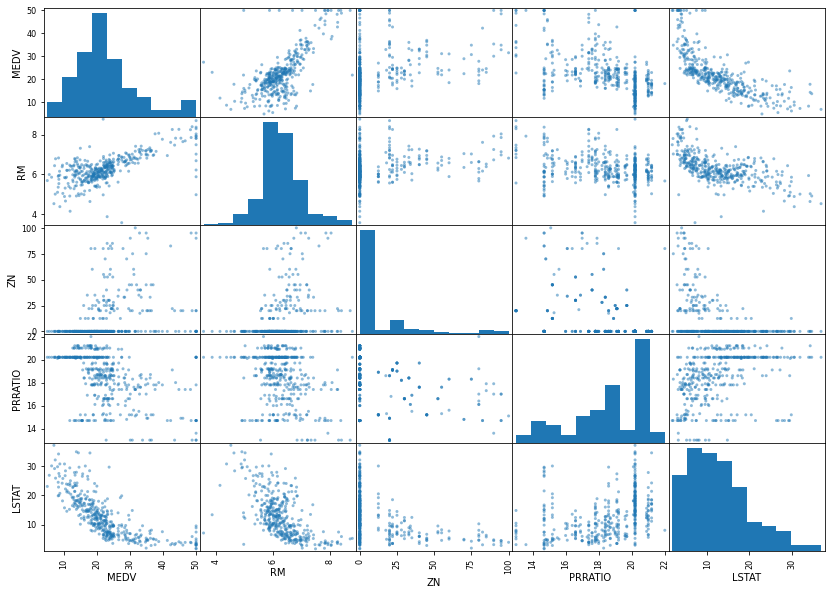

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','PRRATIO','LSTAT']
scatter_matrix(housing[attributes], figsize = (14,10))
#Instead of straight lines on diagonal it shows histogram of that feature

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

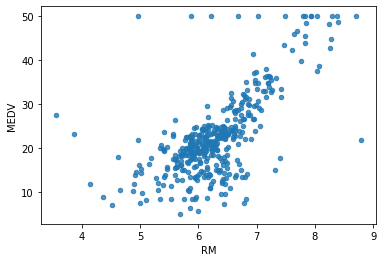

In [20]:
housing.plot(kind="scatter", y='MEDV' , x='RM', alpha = 0.8)

## Attribute Combinations

In [21]:
#Adding a new attribute Tax per Room
housing['TAXRM']= housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# We get new stongly negative correlated attribute TAXRM

MEDV       1.000000
RM         0.678709
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PRRATIO   -0.493534
TAXRM     -0.528058
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
housing = strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes

In [25]:
#To care of missing data, you have 3 options:
#    1. Get rid of data points
#    2. Get rid of that whole attribute
#    3. set the value to 0, mean or median 

#UNITLL I WRITE "inplace = True" the original dataset will not change

#OPTION 1: housing.dropna(subset=['RM']
#          housing.dropna(subset=['RM']).shape


#OPTION 2: housing.drop('RM',axis=1).shape

#OPTION 3: median = housing["RM"].median()
#          median
#          housing['RM'].fillna(median)

In [26]:
median = housing["RM"].median()
median
housing['RM'].fillna(median)
housing.shape

(404, 13)

In [27]:
housing.describe() #Checking Training dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284409,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715885,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X = imputer.transform(housing)

In [31]:
housing_tr = pd.DataFrame(X, columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283599,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711467,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design 

## Feature Scaling

## Pipelining

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
                       # ..... can add as many as we want, accepts a list
                        ('std_scaler',StandardScaler())
                       ])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing)
#We do every task inside pipeline and don't use any of the above things

In [34]:
housing_num_tr.shape

(404, 13)

## Selecting a desired Model for Training

In [35]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(housing_num_tr,housing_labels)

LinearRegression()

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [37]:
prepared_data = my_pipeline.transform(some_data)

In [38]:
model1.predict(prepared_data)

array([23.95292726, 27.21363128, 20.56966168, 25.01360587, 23.74094994])

In [39]:
list(some_labels) #Original Values and seein how the predicted values fare against the data

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model1.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [41]:
lin_mse

23.358767670741635

In [42]:
lin_rmse

4.8330909023875845

In [43]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [44]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse
#This model has overfitted our training data 

0.0

In [46]:
# Printing Properties
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

## Using Better Evaluation Technique - Cross-Validation

In [47]:
# Divides training data in a random set of cv (=10, here) sub-datasets and keeping one sub-dataset as testing and trains with remaining 9.
# We can see error,mean and is very useful way for checking the model used
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([4.21859993, 5.7949305 , 5.4912347 , 3.9541272 , 3.94965188,
       3.51859347, 5.08384697, 3.87920739, 3.43925864, 4.11457774])

In [49]:
print_scores(rmse_scores)

Scores :  [4.21859993 5.7949305  5.4912347  3.9541272  3.94965188 3.51859347
 5.08384697 3.87920739 3.43925864 4.11457774]
Mean :  4.344402843383104
Standard Deviation :  0.7784905079640723


In [50]:
#Cross - Validating Linear Regression Model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.2049952 , 4.27215422, 5.10100048, 3.82801931, 5.34846977,
       4.39802189, 7.46659082, 5.48767788, 4.15031636, 6.06871619])

In [51]:
print_scores(rmse_scores)

Scores :  [4.2049952  4.27215422 5.10100048 3.82801931 5.34846977 4.39802189
 7.46659082 5.48767788 4.15031636 6.06871619]
Mean :  5.03259621146527
Standard Deviation :  1.058524075823237


Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor
model2 = DecisionTreeRegressor()
model2.fit(housing_num_tr,housing_labels)

DecisionTreeRegressor()

In [53]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model2.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model2.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

0.0

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.06324993, 5.34217002, 5.57527206, 4.08366765, 4.05388702,
       3.3144004 , 5.20127388, 3.99192936, 3.25296019, 3.97249921])

In [56]:
print_scores(rmse_scores)

Scores :  [4.06324993 5.34217002 5.57527206 4.08366765 4.05388702 3.3144004
 5.20127388 3.99192936 3.25296019 3.97249921]
Mean :  4.285130972150827
Standard Deviation :  0.7717386865346276


## Saving the Model 

In [57]:
from joblib import dump,load
dump(model2,"Real_Estate.joblib")

['Real_Estate.joblib']

## Testing the Model 

In [58]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model2.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

4.043937607400616

In [59]:
print(final_predictions, list(Y_test))

[28.4 10.9 29.  23.3 20.  18.1 22.4 11.3 32.7 43.8 23.7 10.9 23.1 23.1
 19.  11.5 32.7 14.8 23.1 17.8 23.  15.2 10.9 21.7 16.1 31.6 17.1 33.1
 10.2 32.7 20.  20.6 22.6 10.9 22.3  8.3 48.8 21.2 25.  45.4 25.  23.3
 20.2 19.4 15.6 33.2 48.3 18.9 20.6 18.2 24.5 19.1 21.7 17.1 25.  31.7
 37.6 30.8 19.4 19.9 48.5  6.3 17.5 28.7 17.2 28.7 17.4 13.4 22.3 35.4
 24.3 22.6 18.5 24.5 32.7 16.2 15.6 18.6 22.  19.9 23.9 19.9 10.2 20.7
 26.4 21.2  8.7 23.1 25.  24.1 16.2 22.   5.  29.1 23.1 31.1 24.5 28.7
  8.5 28.6 22.  18.8] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.

In [60]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24711862, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the Model

In [61]:
from joblib import dump,load
import numpy as np
model = load("Real_Estate.joblib")
input = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24711862, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)
# input represents a single datapoint with value of all its features

array([21.9])